In [32]:
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV

## Load Dataset

In [13]:
fires = pd.read_csv("./fires_classif.csv")

In [14]:
X, y = fires.drop("fire", axis=1), fires["fire"]

# Feature Importances

In [17]:
tree = DecisionTreeClassifier().fit(X, y)

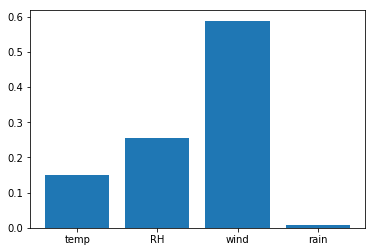

In [18]:
plt.bar(X.columns, tree.feature_importances_);

# Evaluate Models

In [19]:
def evaluate(model, X=X, y=y, cv=10):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring="precision").mean()    
    recall = cross_val_score(model, X, y, cv=cv, scoring="recall").mean()        
    f1 = cross_val_score(model, X, y, cv=cv, scoring="f1").mean()
    
    print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}")

## Logistic Regression

In [20]:
evaluate(LogisticRegression(solver="lbfgs"))

Accuracy: 0.8638513513513513
Precision: 0.8232549593550604
Recall: 0.9007918552036198
F1: 0.8581266353615327


## Decision Tree

In [22]:
evaluate(DecisionTreeClassifier())

Accuracy: 0.9390444015444015
Precision: 0.9458169413432571
Recall: 0.9281297134238311
F1: 0.9312310113651424


## Random Forest

In [6]:
evaluate(RandomForestClassifier(n_estimators=200))

Accuracy: 0.9686212998713
Precision: 0.9671166722864836
Recall: 0.9591628959276018
F1: 0.9613499947885596


## Extra-Trees

In [24]:
evaluate(ExtraTreesClassifier(n_estimators=100))

Accuracy: 0.9659266409266409
Precision: 0.9629175123481934
Recall: 0.9630467571644041
F1: 0.9626154272238316


## XGBoost

In [31]:
evaluate(XGBClassifier())

Accuracy: 0.9686212998713
Precision: 0.9584189318272017
Recall: 0.9746983408748114
F1: 0.9661556227879942


## SVMs

In [22]:
evaluate(SVC(gamma="auto"))

Accuracy: 0.9363256113256113
Precision: 0.9704842376312964
Recall: 0.88736802413273
F1: 0.9245580220367259


## Neural Network

In [23]:
evaluate(MLPClassifier(max_iter=1000))

Accuracy: 0.8997265122265121
Precision: 0.9018554352732616
Recall: 0.8932126696832577
F1: 0.8931529790299221


# Tuning XGBoost

In [33]:
learning_rate_range = [1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1]
max_depth_range = [2, 5, 7, 9, 11, 13]
n_estimators_range = list(range(75, 175))

In [34]:
grid_search = GridSearchCV(
    XGBClassifier(),
    param_grid={"learning_rate": learning_rate_range,
                "max_depth": max_depth_range,
                "n_estimators": n_estimators_range},
    cv=10,
    n_jobs=-1,
    scoring="accuracy",
)

In [35]:
grid_search.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [1e-05, 3e-05, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3], 'max_depth': [2, 5, 7, 9, 11, 13], 'n_estimators': [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 1...155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scor

In [37]:
grid_search.best_score_

0.9677708146821844

In [38]:
grid_search.best_params_

{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 93}

# Save the Model

In [39]:
model = XGBClassifier().fit(X, y)

In [40]:
with open("../../models/fire_proba.b", "wb") as f:
    pickle.dump(model, f)